# [Facebook Prophet](https://github.com/facebook/prophet) and [NeuralProphet](https://github.com/ourownstory/neural_prophet) Comparison
By: Rayhan Ozzy Ertarto

The goal of this notebook is to compare the *expected values* forecasted by these two models and compare them against the actuals in order to calculate the performance metrics and define which model performs better using this time series dataset (Water Level in Karet Floodgate, Central Jakarta)

Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)

In [3]:
plt.style.use('ggplot')

Reading the time series

In [4]:
gsheetkey = "1d0g-fOczYG3WGt3CpmAQzTfT4S0q4MI5BCtHR2HvQoE"

url=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=csv'
df_tma = pd.read_csv(url)
df_tma.head(10)

,id,pintu_air_id,nama_pintu_air,ketinggian,status_siaga,cuaca,tanggal_laporan,jam_laporan,status_bukaan,tinggi_bukaan,keterangan,delete_at,created_at,updated_at
0,1,4,Cideng Tarakan,0,4,Terang,11/17/2021,3:00:00,"[""T"",""T"",""T""]","[""1"",""1"",""1""]",NaN,NaN,11/16/2021 20:37,11/16/2021 20:37
1,2,12,Pasar Ikan - Laut,190,3,Terang,11/17/2021,3:00:00,"[""T"",""T"",""T"",""T""]","[null,null,null,null]",NaN,NaN,11/16/2021 20:43,11/16/2021 20:43
2,3,4,Cideng Tarakan,0,4,Terang,11/17/2021,4:00:00,"[""T"",""T"",""T""]","[""1"",""1"",""1""]",NaN,NaN,11/16/2021 20:43,11/16/2021 20:43
3,4,15,Istiqlal,160,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F""]","[""400"",""400"",""400""]",NaN,NaN,11/16/2021 20:44,11/16/2021 20:44
4,5,6,Manggarai BKB,580,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F""]","[""800"",""800"",""800""]",NaN,NaN,11/16/2021 20:45,11/16/2021 20:45
5,6,7,Manggarai KCL,550,4,Terang,11/17/2021,3:00:00,"[""B""]","[""100""]",NaN,NaN,11/16/2021 20:46,11/16/2021 20:46
6,7,5,PA. Karet,250,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F"",""F"",""F""]","[""700"",""700"",""700"",""700"",""700""]",NaN,NaN,11/16/2021 20:49,11/16/2021 20:49
7,8,14,PA. Marina,187,3,Terang,11/17/2021,3:00:00,"[""F"",""F"",""T"",""T"",""T""]","[""300"",""300"",null,null,null]",NaN,NaN,11/16/2021 20:49,11/16/2021 20:49
8,9,13,Ancol Flushing,188,3,Terang,11/17/2021,3:00:00,"[""T"",""T""]","[null,null]",NaN,NaN,11/16/2021 20:49,11/16/2021 20:49
9,10,16,Jembatan Merah arah Marina,130,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F"",""F""]","[""300"",""300"",""300"",""300""]",NaN,NaN,11/16/2021 20:52,11/16/2021 20:52


In [5]:
df_tma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30556 entries, 0 to 30555
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30556 non-null  object 
 1   pintu_air_id     30556 non-null  int64  
 2   nama_pintu_air   30556 non-null  object 
 3   ketinggian       30556 non-null  object 
 4   status_siaga     30556 non-null  int64  
 5   cuaca            30556 non-null  object 
 6   tanggal_laporan  30556 non-null  object 
 7   jam_laporan      30556 non-null  object 
 8   status_bukaan    30556 non-null  object 
 9   tinggi_bukaan    30556 non-null  object 
 10  keterangan       334 non-null    object 
 11  delete_at        0 non-null      float64
 12  created_at       30556 non-null  object 
 13  updated_at       30556 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.3+ MB


In [6]:
df_tma = df_tma[['pintu_air_id','nama_pintu_air','ketinggian','jam_laporan','updated_at']]
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,updated_at
0,4,Cideng Tarakan,0,3:00:00,11/16/2021 20:37
1,12,Pasar Ikan - Laut,190,3:00:00,11/16/2021 20:43
2,4,Cideng Tarakan,0,4:00:00,11/16/2021 20:43
3,15,Istiqlal,160,3:00:00,11/16/2021 20:44
4,6,Manggarai BKB,580,3:00:00,11/16/2021 20:45
5,7,Manggarai KCL,550,3:00:00,11/16/2021 20:46
6,5,PA. Karet,250,3:00:00,11/16/2021 20:49
7,14,PA. Marina,187,3:00:00,11/16/2021 20:49
8,13,Ancol Flushing,188,3:00:00,11/16/2021 20:49
9,16,Jembatan Merah arah Marina,130,3:00:00,11/16/2021 20:52


In [7]:
df_tma['updated_at'] = pd.to_datetime(df_tma['updated_at']).dt.date
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,updated_at
0,4,Cideng Tarakan,0,3:00:00,2021-11-16
1,12,Pasar Ikan - Laut,190,3:00:00,2021-11-16
2,4,Cideng Tarakan,0,4:00:00,2021-11-16
3,15,Istiqlal,160,3:00:00,2021-11-16
4,6,Manggarai BKB,580,3:00:00,2021-11-16
5,7,Manggarai KCL,550,3:00:00,2021-11-16
6,5,PA. Karet,250,3:00:00,2021-11-16
7,14,PA. Marina,187,3:00:00,2021-11-16
8,13,Ancol Flushing,188,3:00:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,3:00:00,2021-11-16


In [8]:
df_tma = df_tma.rename(columns={'updated_at': 'tanggal'})
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
0,4,Cideng Tarakan,0,3:00:00,2021-11-16
1,12,Pasar Ikan - Laut,190,3:00:00,2021-11-16
2,4,Cideng Tarakan,0,4:00:00,2021-11-16
3,15,Istiqlal,160,3:00:00,2021-11-16
4,6,Manggarai BKB,580,3:00:00,2021-11-16
5,7,Manggarai KCL,550,3:00:00,2021-11-16
6,5,PA. Karet,250,3:00:00,2021-11-16
7,14,PA. Marina,187,3:00:00,2021-11-16
8,13,Ancol Flushing,188,3:00:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,3:00:00,2021-11-16


In [9]:
df_tma['jam_laporan'] = pd.to_datetime(df_tma.jam_laporan).dt.strftime('%H:%M')
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
0,4,Cideng Tarakan,0,03:00,2021-11-16
1,12,Pasar Ikan - Laut,190,03:00,2021-11-16
2,4,Cideng Tarakan,0,04:00,2021-11-16
3,15,Istiqlal,160,03:00,2021-11-16
4,6,Manggarai BKB,580,03:00,2021-11-16
5,7,Manggarai KCL,550,03:00,2021-11-16
6,5,PA. Karet,250,03:00,2021-11-16
7,14,PA. Marina,187,03:00,2021-11-16
8,13,Ancol Flushing,188,03:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,03:00,2021-11-16


In [10]:
df_tma_jakpus = df_tma.loc[(df_tma['pintu_air_id'] == 4) | (df_tma['pintu_air_id'] == 5) |
                           (df_tma['pintu_air_id'] == 6) | (df_tma['pintu_air_id'] == 7) |
                           (df_tma['pintu_air_id'] == 15) | (df_tma['pintu_air_id'] == 16) |
                           (df_tma['pintu_air_id'] == 19)]
df_tma_jakpus.head(20)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
0,4,Cideng Tarakan,0,03:00,2021-11-16
2,4,Cideng Tarakan,0,04:00,2021-11-16
3,15,Istiqlal,160,03:00,2021-11-16
4,6,Manggarai BKB,580,03:00,2021-11-16
5,7,Manggarai KCL,550,03:00,2021-11-16
6,5,PA. Karet,250,03:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,03:00,2021-11-16
10,19,Jembatan Merah arah Husada,130,03:00,2021-11-16
18,6,Manggarai BKB,195,04:00,2021-11-16
21,6,Manggarai BKB,580,04:00,2021-11-16


In [11]:
df_tma_kar = df_tma_jakpus.loc[(df_tma['pintu_air_id'] == 5)]
df_tma_kar.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
6,5,PA. Karet,250,03:00,2021-11-16
25,5,PA. Karet,250,04:00,2021-11-16
36,5,PA. Karet,250,05:00,2021-11-16
58,5,PA. Karet,250,06:00,2021-11-16
71,5,PA. Karet,250,07:00,2021-11-16
72,5,PA. Karet,250,07:00,2021-11-16
93,5,PA. Karet,250,08:00,2021-11-17
102,5,PA. Karet,250,09:00,2021-11-17
120,5,PA. Karet,250,10:00,2021-11-17
126,5,PA. Karet,250,11:00,2021-11-17


In [12]:
df_tma_kar['tanggal'] = df_tma_kar['tanggal'].astype(str)

/tmp/wsuser/ipykernel_913/2856004157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tma_kar['tanggal'] = df_tma_kar['tanggal'].astype(str)


In [13]:
df_tma_kar['ketinggian'] = df_tma_kar['ketinggian'].astype(int)

/tmp/wsuser/ipykernel_913/2898601504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tma_kar['ketinggian'] = df_tma_kar['ketinggian'].astype(int)


In [14]:
df_tma_kar['waktu'] = df_tma_kar[['tanggal','jam_laporan']].agg(' '.join,axis=1)
df_tma_kar.head(10)

/tmp/wsuser/ipykernel_913/3439665280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tma_kar['waktu'] = df_tma_kar[['tanggal','jam_laporan']].agg(' '.join,axis=1)


,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal,waktu
6,5,PA. Karet,250,03:00,2021-11-16,2021-11-16 03:00
25,5,PA. Karet,250,04:00,2021-11-16,2021-11-16 04:00
36,5,PA. Karet,250,05:00,2021-11-16,2021-11-16 05:00
58,5,PA. Karet,250,06:00,2021-11-16,2021-11-16 06:00
71,5,PA. Karet,250,07:00,2021-11-16,2021-11-16 07:00
72,5,PA. Karet,250,07:00,2021-11-16,2021-11-16 07:00
93,5,PA. Karet,250,08:00,2021-11-17,2021-11-17 08:00
102,5,PA. Karet,250,09:00,2021-11-17,2021-11-17 09:00
120,5,PA. Karet,250,10:00,2021-11-17,2021-11-17 10:00
126,5,PA. Karet,250,11:00,2021-11-17,2021-11-17 11:00


In [15]:
df_tma_kar = df_tma_kar[['waktu','ketinggian']]
df_tma_kar.head(10)

,waktu,ketinggian
6,2021-11-16 03:00,250
25,2021-11-16 04:00,250
36,2021-11-16 05:00,250
58,2021-11-16 06:00,250
71,2021-11-16 07:00,250
72,2021-11-16 07:00,250
93,2021-11-17 08:00,250
102,2021-11-17 09:00,250
120,2021-11-17 10:00,250
126,2021-11-17 11:00,250


In [16]:
df_tma_kar.drop_duplicates(subset='waktu',keep='first',inplace=True)

In [17]:
# Renaming columns
df_tma_kar.rename(columns = {'waktu':'ds', 'ketinggian':'y'}, inplace = True)
df_tma_kar.head()

,ds,y
6,2021-11-16 03:00,250
25,2021-11-16 04:00,250
36,2021-11-16 05:00,250
58,2021-11-16 06:00,250
71,2021-11-16 07:00,250


In [18]:
df_tma_kar['ds'] = pd.DatetimeIndex(df_tma_kar['ds'])
df_tma_kar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 6 to 30542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2170 non-null   datetime64[ns]
 1   y       2170 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 50.9 KB


In [19]:
df_tma_kar.head(10)

,ds,y
6,2021-11-16 03:00:00,250
25,2021-11-16 04:00:00,250
36,2021-11-16 05:00:00,250
58,2021-11-16 06:00:00,250
71,2021-11-16 07:00:00,250
93,2021-11-17 08:00:00,250
102,2021-11-17 09:00:00,250
120,2021-11-17 10:00:00,250
126,2021-11-17 11:00:00,250
139,2021-11-17 12:00:00,270


In [20]:
df_tma_kar.tail(10)

,ds,y
30428,2022-02-18 07:00:00,320
30433,2022-02-18 08:00:00,330
30444,2022-02-18 09:00:00,340
30456,2022-02-18 10:00:00,340
30472,2022-02-18 11:00:00,340
30488,2022-02-18 12:00:00,350
30499,2022-02-18 13:00:00,360
30518,2022-02-18 14:00:00,350
30530,2022-02-18 15:00:00,330
30542,2022-02-18 16:00:00,310


Text(0.5, 1.0, 'Time Series Plot')

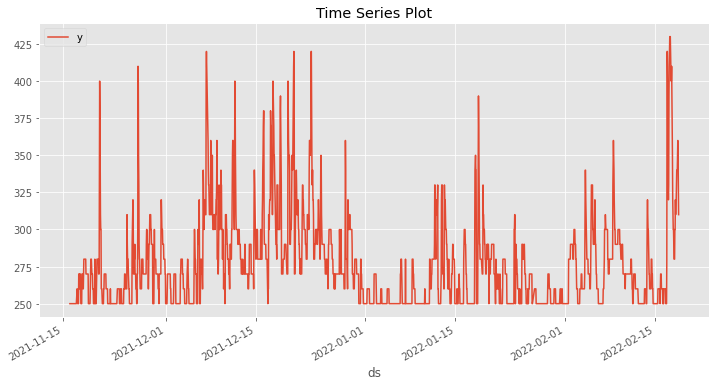

In [21]:
df_tma_kar.set_index('ds').plot(figsize=(12,6))
plt.title('Time Series Plot')

## Prophet Model

In [22]:
!pip install prophet -q

In [23]:
from prophet import Prophet

In [24]:
m = Prophet(seasonality_mode='additive')

Using default settings, only the seasonality mode is set to *Additive*



In [25]:
m.fit(df_tma_kar)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -9.90551
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4914.11    0.00294338       333.935      0.2357      0.2357      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       4919.08   0.000128917       91.8997   5.868e-07       0.001      218  LS failed, Hessian reset 
     199       4922.83    0.00201423       76.4065           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       4923.85    0.00011659       113.663   1.149e-06       0.001      362  LS failed, Hessian reset 
     299       4925.12    0.00430167       375.222           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4925.69    3.2394e-05       83.6823           1           1      594   
    Iter      log pro

In [26]:
future = m.make_future_dataframe(periods=1440, freq='H')

In [27]:
future.tail(5)

,ds
3605,2022-04-19 12:00:00
3606,2022-04-19 13:00:00
3607,2022-04-19 14:00:00
3608,2022-04-19 15:00:00
3609,2022-04-19 16:00:00


In [28]:
forecast = m.predict(future)

In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3605,2022-04-19 12:00:00,385.423391,248.830640,545.531102,243.362051,531.872322,7.977353,7.977353,7.977353,4.515829,4.515829,4.515829,3.461524,3.461524,3.461524,0.0,0.0,0.0,393.400744
3606,2022-04-19 13:00:00,385.487952,247.384666,542.681256,243.280208,531.971471,8.089133,8.089133,8.089133,4.520535,4.520535,4.520535,3.568597,3.568597,3.568597,0.0,0.0,0.0,393.577085
3607,2022-04-19 14:00:00,385.552513,250.451763,540.362333,243.230856,532.094256,7.713093,7.713093,7.713093,4.059754,4.059754,4.059754,3.653339,3.653339,3.653339,0.0,0.0,0.0,393.265606
3608,2022-04-19 15:00:00,385.617074,244.860339,545.893540,243.181504,532.239993,6.975080,6.975080,6.975080,3.256947,3.256947,3.256947,3.718133,3.718133,3.718133,0.0,0.0,0.0,392.592154
3609,2022-04-19 16:00:00,385.681635,252.095013,544.460485,243.132863,532.385730,6.097988,6.097988,6.097988,2.332452,2.332452,2.332452,3.765536,3.765536,3.765536,0.0,0.0,0.0,391.779623


Text(0.5, 1.0, 'Forecast of the Time Series in the next 60 days (1440 hours)')

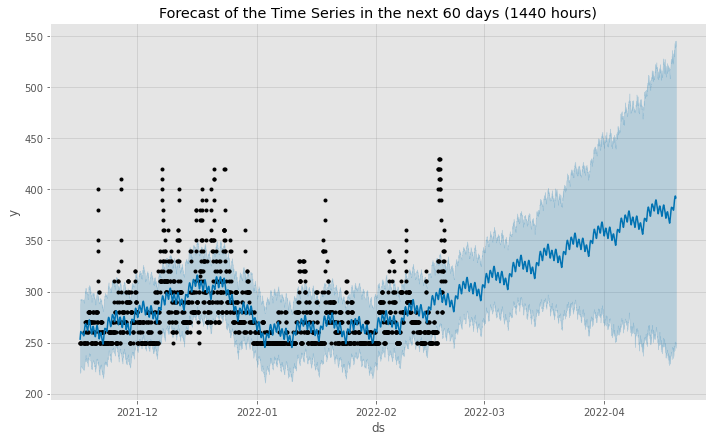

In [30]:
m.plot(forecast);
plt.title("Forecast of the Time Series in the next 60 days (1440 hours)")

Components of the time series:


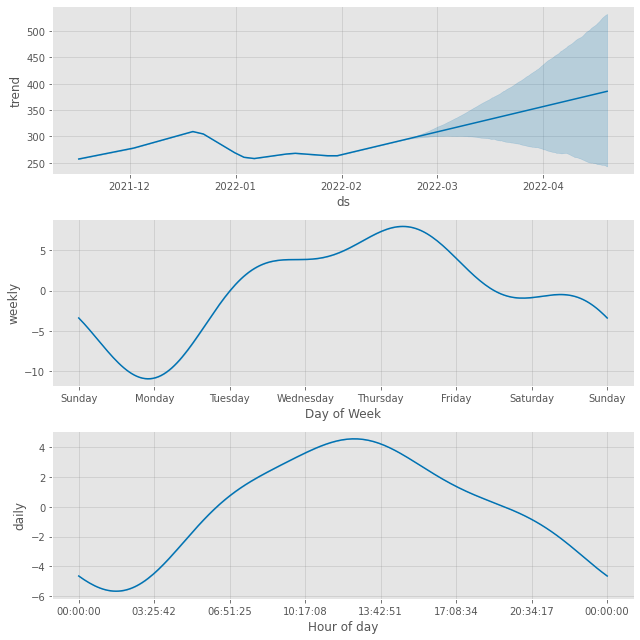

In [31]:
m.plot_components(forecast);
print("Components of the time series:")

In [32]:
#p_forecast = forecast[forecast['ds']>'2022-02-18 16:00:00'][['ds','yhat_lower','yhat','yhat_upper']]
p_forecast = forecast[['ds','yhat_lower','yhat','yhat_upper']]
p_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          3610 non-null   datetime64[ns]
 1   yhat_lower  3610 non-null   float64       
 2   yhat        3610 non-null   float64       
 3   yhat_upper  3610 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 112.9 KB


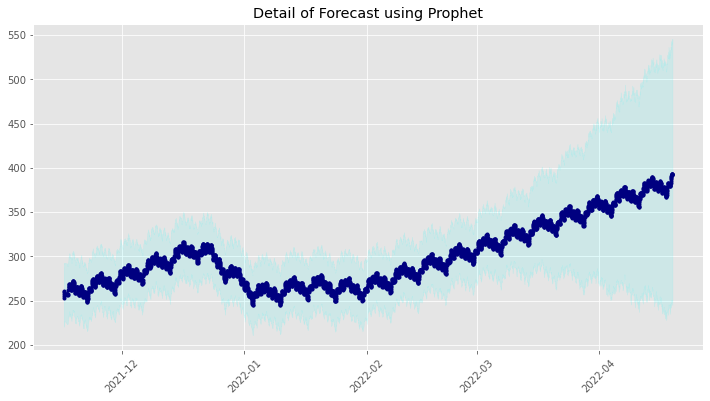

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using Prophet")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy')
plt.fill_between(p_forecast['ds'],p_forecast['yhat_lower'], p_forecast['yhat_upper'], alpha=0.1, color='cyan')

### Performance Metrics

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
df_tma_kar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 6 to 30542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2170 non-null   datetime64[ns]
 1   y       2170 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 50.9 KB


In [36]:
df_tma_kar_merge = pd.merge(df_tma_kar, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_tma_kar_merge = df_tma_kar_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_tma_kar_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-11-16 03:00:00,220.276098,287.347792,253.392183,250
1,2021-11-16 04:00:00,223.095113,289.046904,255.155551,250
2,2021-11-16 05:00:00,221.170202,292.654430,257.212928,250
3,2021-11-16 06:00:00,226.932777,291.280205,259.168977,250
4,2021-11-16 07:00:00,227.203855,292.697226,260.783971,250


In [37]:
df_tma_kar_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
2165,2022-02-18 12:00:00,263.659057,331.188609,296.987255,350
2166,2022-02-18 13:00:00,264.439373,327.565654,296.850147,360
2167,2022-02-18 14:00:00,263.806977,330.233630,296.273610,350
2168,2022-02-18 15:00:00,262.341556,329.243089,295.381332,330
2169,2022-02-18 16:00:00,261.269007,325.404825,294.393507,310


In [38]:
prophet_mse = mean_squared_error(df_tma_kar_merge['y'], df_tma_kar_merge['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(df_tma_kar_merge['y'], df_tma_kar_merge['yhat']))

In [39]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 683.2334
Prophet RMSE: 26.1387


## NeuralProphet

In [40]:
!pip install neuralprophet -q

In [41]:
from neuralprophet import NeuralProphet, set_random_seed

In [42]:
set_random_seed(42)

In [43]:
nm = NeuralProphet(seasonality_mode='additive')

In [44]:
nm.fit(df_tma_kar, freq='H')

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.005% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 97.005% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 154
INFO:NP.config:Auto-set epochs to 154


  0%|          | 0/133 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 1.69E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.00E-01, min: 1.69E+00


  0%|          | 0/133 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.17E-01, min: 4.11E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.17E-01, min: 4.11E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.05E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.05E-01
Epoch[154/154]: 100%|██████████| 154/154 [00:17<00:00,  8.81it/s, SmoothL1Loss=0.0409, MAE=18.1, RMSE=25.4, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.686973,98.882760,121.420684,0.0
1,0.604844,90.613181,111.481861,0.0
2,0.508131,80.785626,99.448126,0.0
3,0.392218,68.700415,84.369630,0.0
4,0.267132,55.288298,67.081895,0.0
...,...,...,...,...
149,0.040955,18.110523,25.275603,0.0
150,0.040927,18.129206,25.320336,0.0
151,0.040903,18.113696,25.310696,0.0
152,0.040879,18.109159,25.073482,0.0


In [45]:
n_future = nm.make_future_dataframe(df_tma_kar, periods=1440, n_historic_predictions=len(df_tma_kar))
n_future

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 90.461% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 90.461% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H


,ds,y
0,2021-11-16 03:00:00,250
1,2021-11-16 04:00:00,250
2,2021-11-16 05:00:00,250
3,2021-11-16 06:00:00,250
4,2021-11-16 07:00:00,250
...,...,...
3605,2022-04-19 12:00:00,None
3606,2022-04-19 13:00:00,None
3607,2022-04-19 14:00:00,None
3608,2022-04-19 15:00:00,None


In [46]:
n_future.tail()

,ds,y
3605,2022-04-19 12:00:00,None
3606,2022-04-19 13:00:00,None
3607,2022-04-19 14:00:00,None
3608,2022-04-19 15:00:00,None
3609,2022-04-19 16:00:00,None


In [47]:
n_forecast = nm.predict(n_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 98.199% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 98.199% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 98.199% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 98.199% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H


In [48]:
n_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             3610 non-null   datetime64[ns]
 1   y              2170 non-null   object        
 2   yhat1          3610 non-null   float64       
 3   residual1      2170 non-null   object        
 4   trend          3610 non-null   float64       
 5   season_weekly  3610 non-null   float64       
 6   season_daily   3610 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 197.5+ KB


In [49]:
n_forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
3605,2022-04-19 12:00:00,None,402.824829,NaN,395.022949,3.212819,4.589077
3606,2022-04-19 13:00:00,None,403.037292,NaN,395.094238,3.383793,4.559243
3607,2022-04-19 14:00:00,None,403.703217,NaN,395.165527,3.537634,5.000043
3608,2022-04-19 15:00:00,None,403.307648,NaN,395.236816,3.676065,4.394771
3609,2022-04-19 16:00:00,None,401.201843,NaN,395.308105,3.800933,2.092803


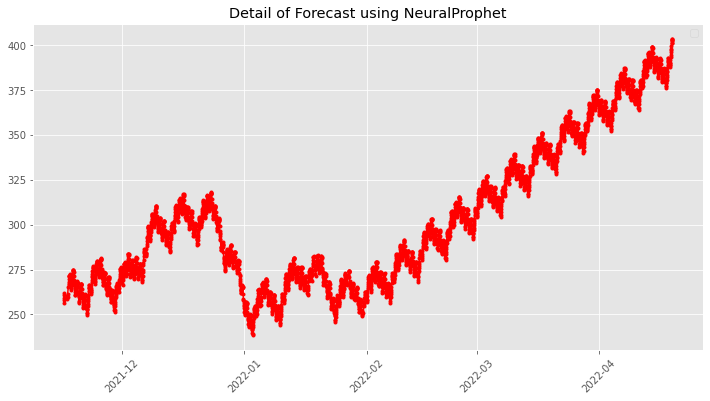

In [50]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using NeuralProphet")
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red')
plt.legend()

Text(0.5, 1.0, 'Forecast of the Time Series in the next 60 days (1440 hours)')

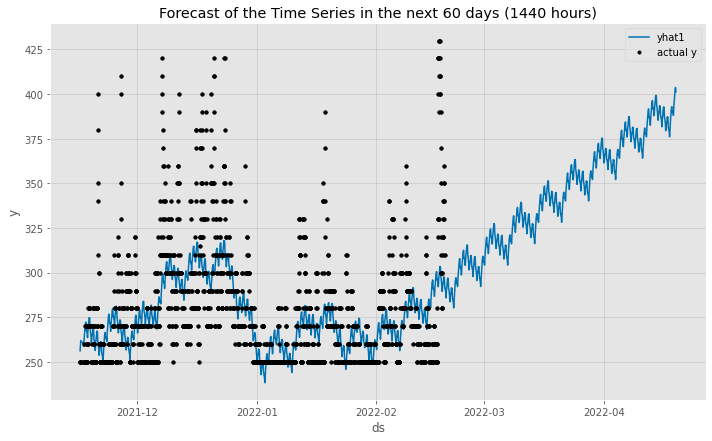

In [51]:
nm.plot(pd.concat([df_tma_kar, n_forecast], ignore_index=True));
plt.title("Forecast of the Time Series in the next 60 days (1440 hours)")

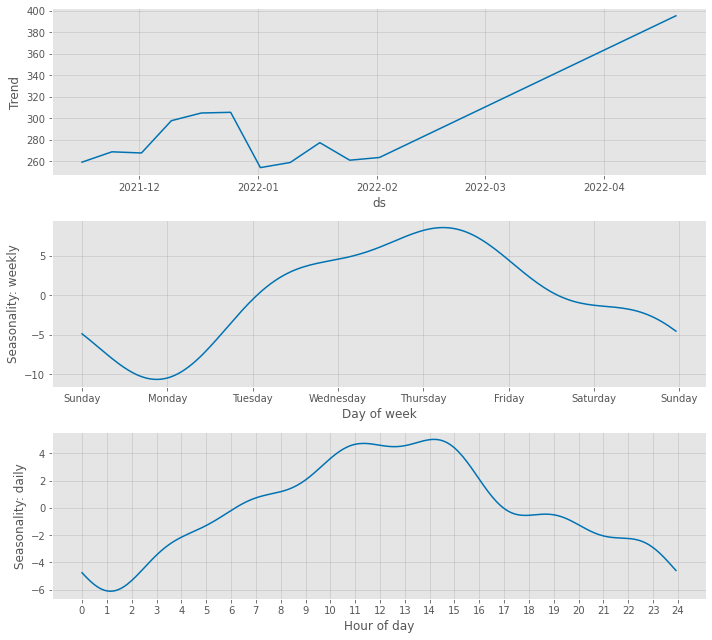

In [52]:
nm.plot_components(pd.concat([df_tma_kar, n_forecast], ignore_index=True));

### Performance Metrics

In [53]:
n_forecast

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2021-11-16 03:00:00,250,256.245300,6.2453,258.998962,0.711712,-3.465375
1,2021-11-16 04:00:00,250,257.978271,7.978271,259.050812,1.082007,-2.154555
2,2021-11-16 05:00:00,250,259.234558,9.234558,259.102692,1.429109,-1.297255
3,2021-11-16 06:00:00,250,260.709595,10.709595,259.154572,1.752634,-0.197599
4,2021-11-16 07:00:00,250,261.988770,11.98877,259.206451,2.052490,0.729824
...,...,...,...,...,...,...,...
3605,2022-04-19 12:00:00,None,402.824829,NaN,395.022949,3.212819,4.589077
3606,2022-04-19 13:00:00,None,403.037292,NaN,395.094238,3.383793,4.559243
3607,2022-04-19 14:00:00,None,403.703217,NaN,395.165527,3.537634,5.000043
3608,2022-04-19 15:00:00,None,403.307648,NaN,395.236816,3.676065,4.394771


In [54]:
n_forecast_merge = pd.merge(df_tma_kar, n_forecast[['ds','yhat1','residual1']],on='ds')
n_forecast_merge = n_forecast_merge[['ds','yhat1','residual1','y']]
n_forecast_merge.head()

,ds,yhat1,residual1,y
0,2021-11-16 03:00:00,256.245300,6.2453,250
1,2021-11-16 04:00:00,257.978271,7.978271,250
2,2021-11-16 05:00:00,259.234558,9.234558,250
3,2021-11-16 06:00:00,260.709595,10.709595,250
4,2021-11-16 07:00:00,261.988770,11.98877,250


In [55]:
n_prophet_mse = mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1'])
n_prophet_rmse = np.sqrt(mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1']))

In [56]:
print("Neural Prophet MSE: {:.4f}".format(n_prophet_mse))
print("Neural Prophet RMSE: {:.4f}".format(n_prophet_rmse))

Neural Prophet MSE: 672.7839
Neural Prophet RMSE: 25.9381


In [57]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 683.2334
Prophet RMSE: 26.1387


In [58]:
n_prophet_mse - prophet_mse

-10.449510050300546

In [59]:
n_prophet_rmse - prophet_rmse

-0.20065571766378199

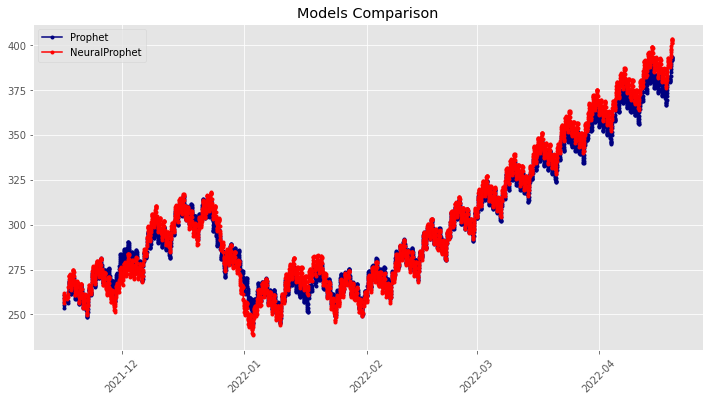

In [60]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Models Comparison")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy', label='Prophet')
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red', label='NeuralProphet')
plt.legend()

In [61]:
pd.DataFrame({'metrics':['MSE','RMSE'],
              'Prophet ':[prophet_mse, prophet_rmse],
              'Neural Prophet':[n_prophet_mse, n_prophet_rmse]
             })

,metrics,Prophet,Neural Prophet
0,MSE,683.233403,672.783893
1,RMSE,26.138734,25.938078


## Final Comments

*   At least for this particular dataset and using the default arguments,  the **NeuralProphet** model scored a **MSE** of **672.783893** and **RMSE** of **25.938078** whereas the **Prophet** model scored a **MSE** of **683.233403** and **RMSE** of **26.138734**, a **10.449510050300546 and 0.20065571766378199 difference of MSE and RMSE respectively** compared against the first model.